# Day-36: Principal Component Analysis (PCA)

Today, we'll go into more detail on the core mechanics of **Principal Component Analysis (PCA)** which we had learned in day 34: Dimensionality Reduction for Clustring. While we've used it for visualization, understanding its mathematical underpinnings is crucial for using it effectively. We'll focus on the concepts you requested: variance explained, eigenvectors/eigenvalues, and the scree plot.

## Eigenvectors and Eigenvalues

At its core, PCA is an algorithm that finds the eigenvectors and eigenvalues of a dataset's covariance matrix.

### Eigenvectors: 

Think of your dataset as a cloud of points in space. An eigenvector is a special vector that represents a principal component—a new, straight-line axis through this cloud. These eigenvectors are the new directions that capture the most variance in your data. The first eigenvector (PC1) points in the direction of the most spread-out data, the second (PC2) in the next most spread-out direction, and so on.

### Eigenvalues:

Every eigenvector has a corresponding eigenvalue. The eigenvalue's size tells you the magnitude or importance of the eigenvector. A larger eigenvalue means that its corresponding eigenvector captures more of the data's variance. By ordering the eigenvalues from largest to smallest, we can rank our principal components by their importance.

## Variance Explained

The **variance explained** for each principal component tells you the proportion of the total data variance that is captured by that component.

You can calculate this value by taking the eigenvalue of a principal component and dividing it by the sum of all eigenvalues.

$$
Variance\;Explained_{i} = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

where ${\lambda_i}$ is the eigenvalue for the i-th principal component. The cumulative variance explained, which is the sum of the variances of the first n components, is a key metric to determine how much information you are retaining.

## The Scree Plot


A scree plot is a line plot that shows the eigenvalues (or variance explained) for each principal component in descending order. Its primary purpose is to help you decide how many components to keep for your analysis.

Analogy: A Scree Slope ⛰️
The term "scree" comes from geology, referring to the pile of loose rock at the base of a cliff. A scree plot visually represents this.

The first few principal components, which have very high eigenvalues, represent the steep cliff face. They capture a large amount of the variance.

The later components, with very low eigenvalues, represent the flat pile of scree at the base. They add very little new information.

The "elbow" in the plot is the point where the steep cliff turns into the flat scree slope.

You should aim to keep the principal components up to and including the elbow point. This allows you to capture most of the data's variance while discarding the components that are likely just noise. This is similar to the elbow method we used for K-Means clustering to find the optimal number of clusters.

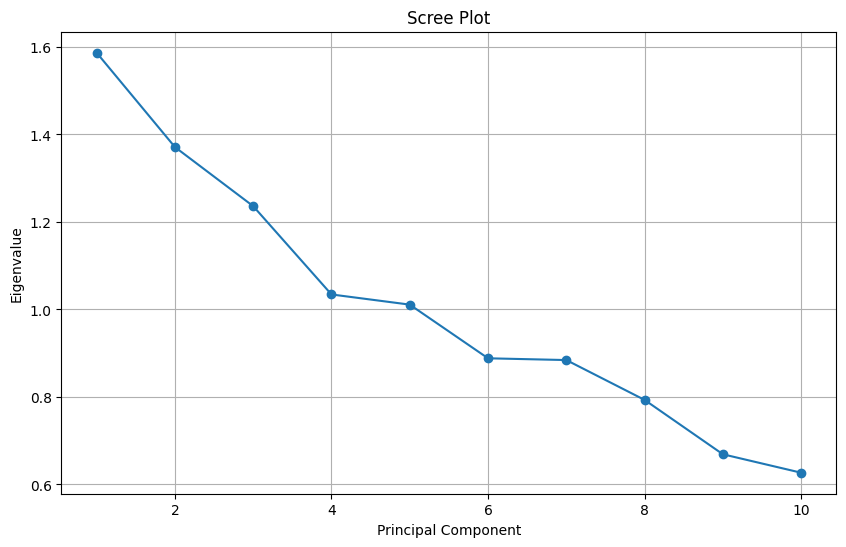

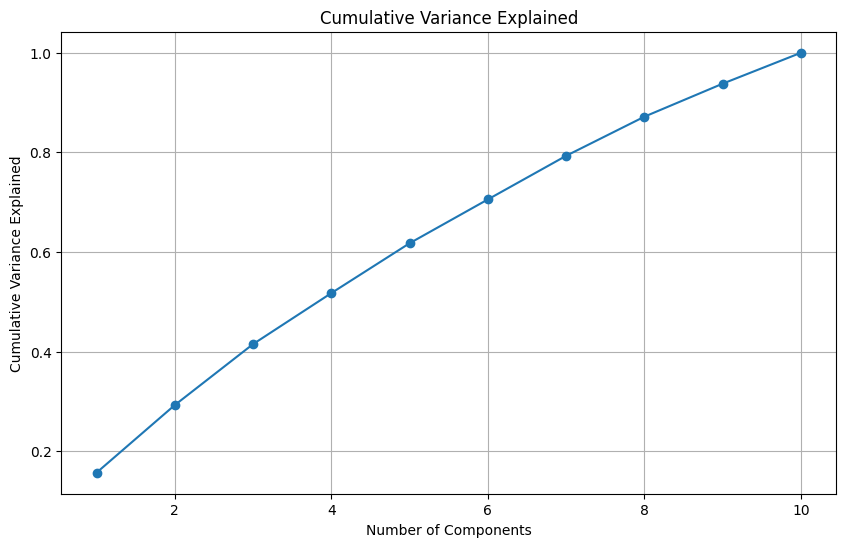

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Let's use a simulated high-dimensional dataset
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 data points with 10 features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to all components (n_components=None)
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues and variance explained ratio
eigenvalues = pca.explained_variance_
variance_explained = pca.explained_variance_ratio_

# Create the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Create the Cumulative Variance Explained Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), np.cumsum(variance_explained), 'o-')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [3]:
# Assuming X_scaled is your standardized DataFrame from a previous step

# 1. Choose the number of components
n_components_to_keep = 3

# 2. Apply PCA with the chosen number of components
pca = PCA(n_components=n_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

print(f"The shape of the original data was: {X_scaled.shape}")
print(f"The shape of the new PCA-transformed data is: {X_pca.shape}")

# 3. Check the total variance explained by these components
print(f"\nCumulative variance explained by {n_components_to_keep} components: {pca.explained_variance_ratio_.sum():.2%}")

The shape of the original data was: (100, 10)
The shape of the new PCA-transformed data is: (100, 3)

Cumulative variance explained by 3 components: 41.52%
